# Task-1: Prepare a model for glass classification using KNN

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('data/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Data Visualisation

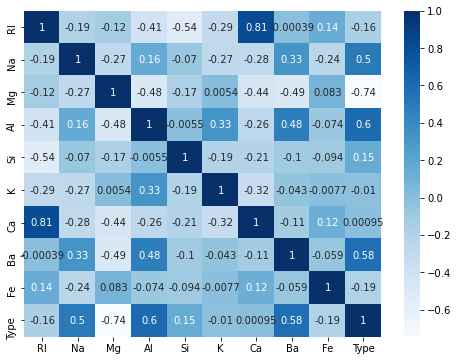

In [5]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

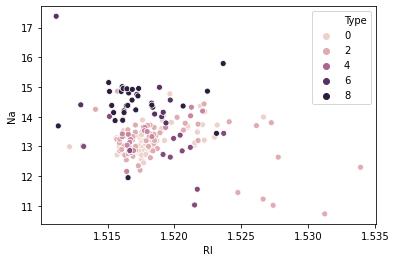

In [6]:
sns.scatterplot(df['RI'],df['Na'],hue=df['Type'])

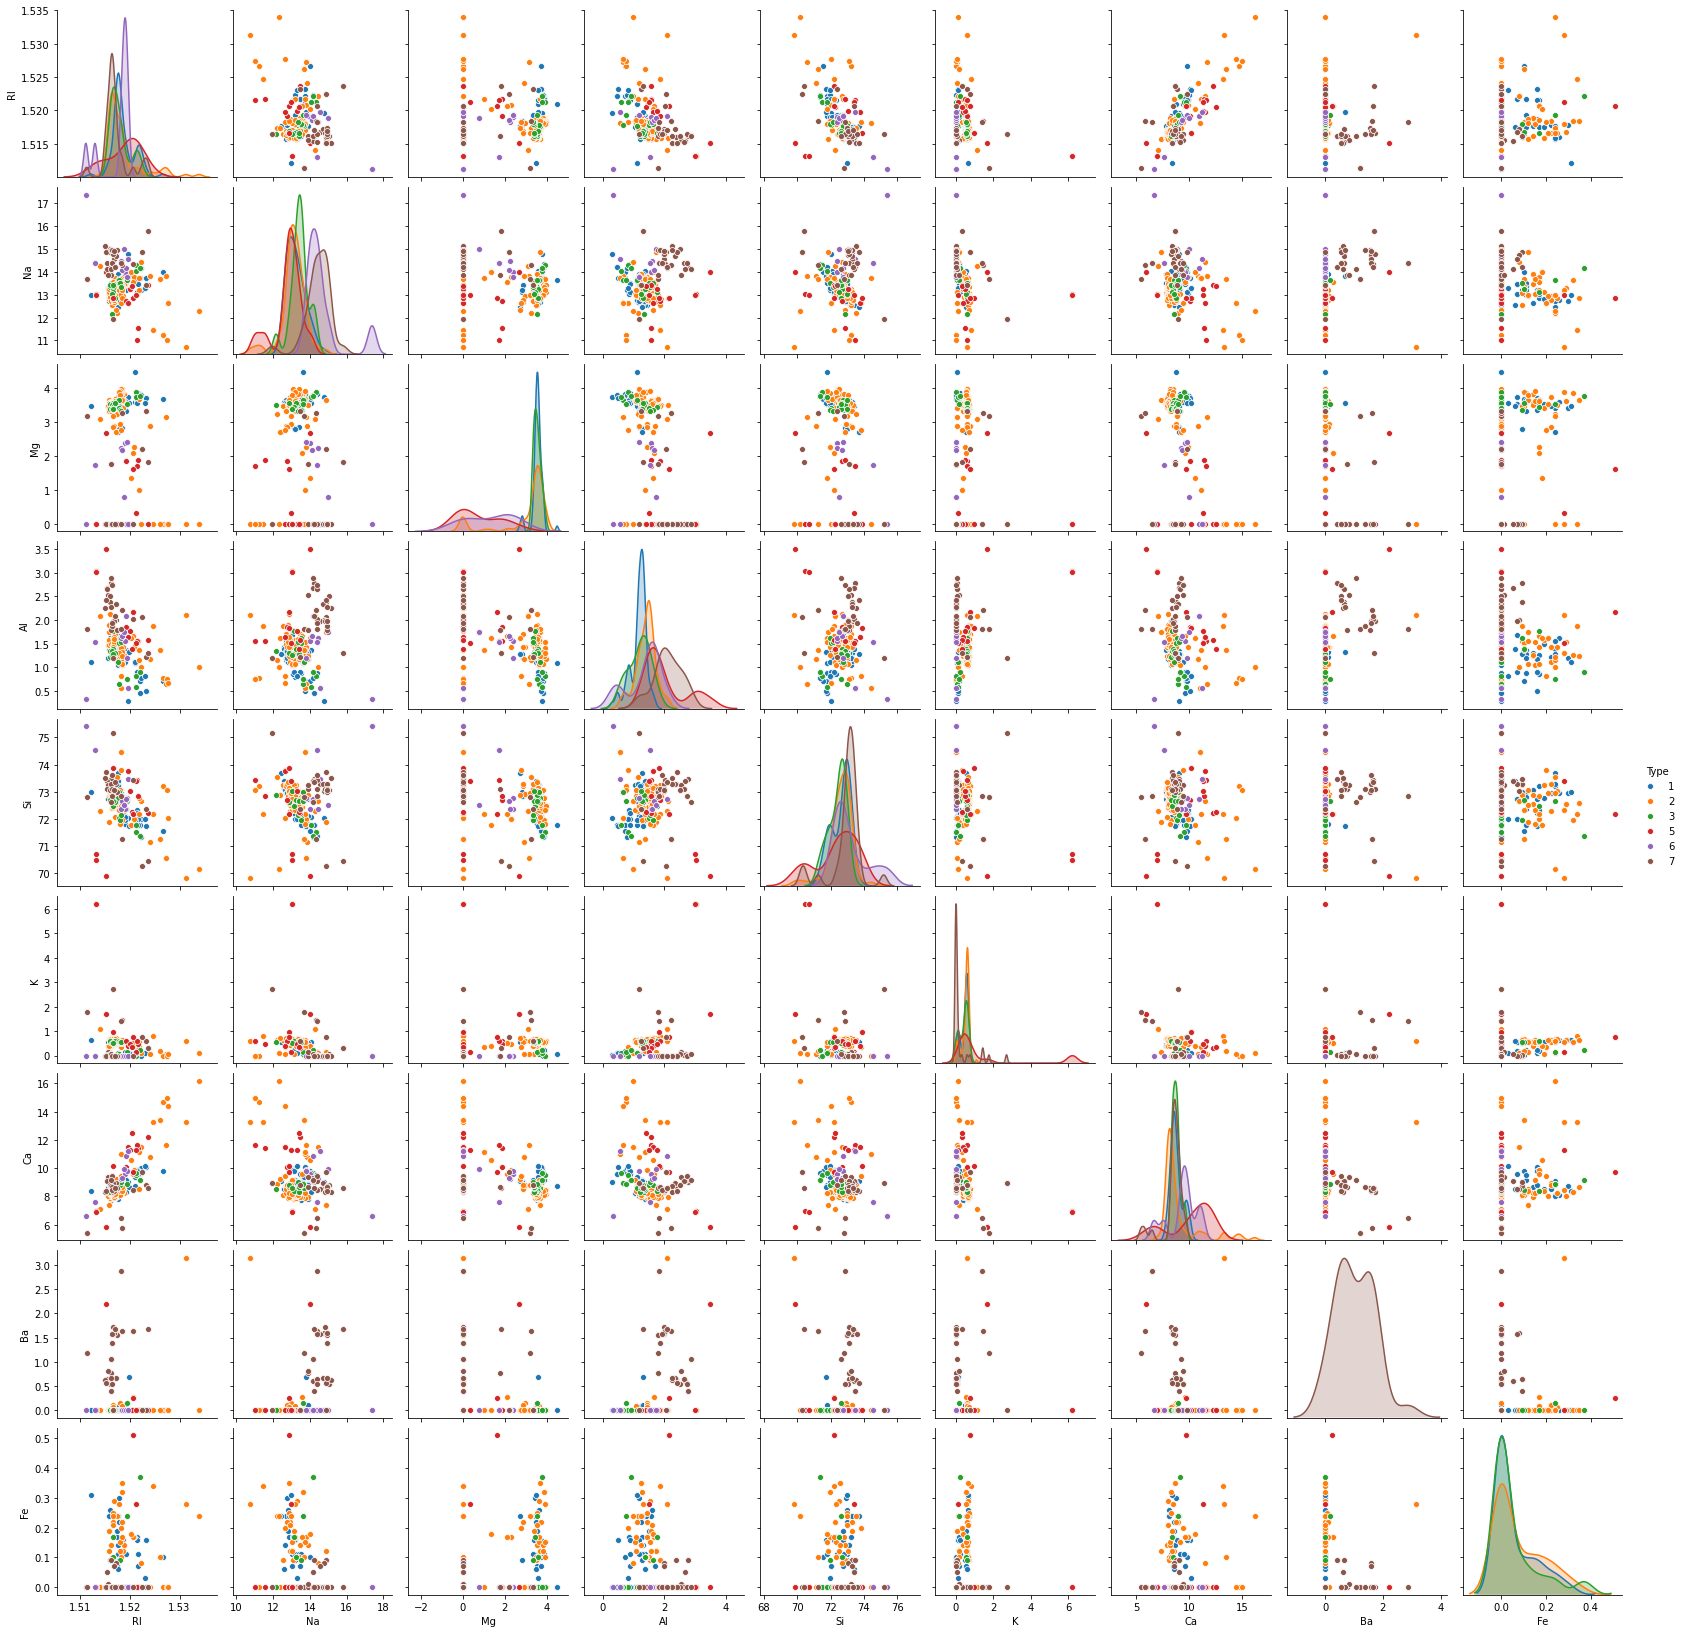

In [7]:
#pairwise plot of all the features
sns.pairplot(df,hue='Type')
plt.show()

# Feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scale = StandardScaler()

In [11]:
scaled_features = scale.fit_transform(df.drop('Type',axis=1))
scaled_features

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
dff = df_feat.drop(['Ca','K'],axis=1) #Removing features - Ca and K 
X_train,X_test,y_train,y_test  = train_test_split(dff , df['Type'] , test_size = 0.20 , random_state = 42)

In [17]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [18]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train , y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [19]:
print(grid.best_score_)
print(grid.best_params_)

0.6727731092436975
{'n_neighbors': 1}


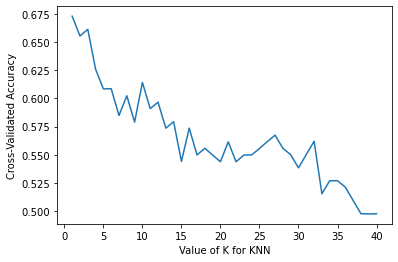

In [20]:
# Visualising cv

# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train , y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [21]:
model = KNeighborsClassifier(n_neighbors= 1)

In [22]:
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [24]:
# Performance
print('Predicted value counts: \n',pd.Series(y_pred).value_counts())
print('-'*50)
print('Confusion Matrix: \n', confusion_matrix(y_test , y_pred))
print('-'*50) 
print('Classification Report: \n', classification_report(y_test , y_pred))
print('-'*50)
print('Accuracy Score = ',accuracy_score(y_test , y_pred))

Predicted value counts: 
 2    16
1    11
7     7
6     3
5     3
3     3
dtype: int64
--------------------------------------------------
Confusion Matrix: 
 [[ 8  2  1  0  0  0]
 [ 3 11  0  0  0  0]
 [ 0  1  2  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  1  2  0]
 [ 0  0  0  0  1  7]]
--------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           1       0.73      0.73      0.73        11
           2       0.69      0.79      0.73        14
           3       0.67      0.67      0.67         3
           5       0.67      0.50      0.57         4
           6       0.67      0.67      0.67         3
           7       1.00      0.88      0.93         8

    accuracy                           0.74        43
   macro avg       0.74      0.70      0.72        43
weighted avg       0.75      0.74      0.74        43

--------------------------------------------------
Accuracy Score =  0.7441860465116279
